# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key = "4d07827eb7d15f0c6bac33203e222007"
geoapify_key = "f76b71d9aa0c4c4d8e5b01cff5e06c63"

print(weather_api_key)

4d07827eb7d15f0c6bac33203e222007


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url =f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f'&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()
# print(url+'&q=bluff')
# print(json.dumps(city_weather,indent=4))
   
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        
#         Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lucapa
Processing Record 2 of Set 1 | padang
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | vanavara
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | ohara
Processing Record 12 of Set 1 | alegrete
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | ciudad guayana
Processing Record 17 of Set 1 | toora-khem
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | puerto escondido


Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | lingao
Processing Record 42 of Set 4 | rocha
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | shakiso
Processing Record 45 of Set 4 | shache
Processing Record 46 of Set 4 | santa cruz
Processing Record 47 of Set 4 | poum
Processing Record 48 of Set 4 | quatre cocos
Processing Record 49 of Set 4 | north bend
Processing Record 0 of Set 5 | kurchum
Processing Record 1 of Set 5 | severo-kurilsk
Processing Record 2 of Set 5 | coacoyul
Processing Record 3 of Set 5 | camacha
Processing Record 4 of Set 5 | rajapur
Processing Record 5 of Set 5 | acapulco
Processing Record 6 of Set 5 | xifeng
Processing Record 7 of Set 5 | haines junction
Processing Record 8 of Set 5 | yulara
Processing Record 9 of Set 5 | ostrovnoy
Processing Record 10 of Set 5 | leningradskiy
Processing Record 11 of Set 5 | sao joao da barra
Processing Record 12 of Set 5 | songjianghe
Pr

Processing Record 27 of Set 8 | tucuma
Processing Record 28 of Set 8 | inuvik
Processing Record 29 of Set 8 | skelleftea
Processing Record 30 of Set 8 | daru
Processing Record 31 of Set 8 | namatanai
Processing Record 32 of Set 8 | honiara
Processing Record 33 of Set 8 | shahreza
Processing Record 34 of Set 8 | mahuva
Processing Record 35 of Set 8 | vallenar
Processing Record 36 of Set 8 | vao
Processing Record 37 of Set 8 | port hardy
Processing Record 38 of Set 8 | marica
Processing Record 39 of Set 8 | krivosheino
Processing Record 40 of Set 8 | iralaya
Processing Record 41 of Set 8 | serebriya
Processing Record 42 of Set 8 | clearlake
Processing Record 43 of Set 8 | acandi
Processing Record 44 of Set 8 | flinders
Processing Record 45 of Set 8 | cumberland
Processing Record 46 of Set 8 | richards bay
Processing Record 47 of Set 8 | kalabo
Processing Record 48 of Set 8 | ancud
Processing Record 49 of Set 8 | roald
Processing Record 0 of Set 9 | lipin bor
Processing Record 1 of Set 9 

Processing Record 18 of Set 12 | misratah
Processing Record 19 of Set 12 | buala
Processing Record 20 of Set 12 | phalodi
Processing Record 21 of Set 12 | henties bay
Processing Record 22 of Set 12 | kirakira
Processing Record 23 of Set 12 | mossoro
Processing Record 24 of Set 12 | kinsale
Processing Record 25 of Set 12 | nabire
Processing Record 26 of Set 12 | chokwe
Processing Record 27 of Set 12 | dinsor
City not found. Skipping...
Processing Record 28 of Set 12 | gushikawa
Processing Record 29 of Set 12 | baft
Processing Record 30 of Set 12 | goundi
Processing Record 31 of Set 12 | kushikino
Processing Record 32 of Set 12 | kumluca
Processing Record 33 of Set 12 | le port
Processing Record 34 of Set 12 | tokat
Processing Record 35 of Set 12 | lodja
Processing Record 36 of Set 12 | bure
Processing Record 37 of Set 12 | sukumo
Processing Record 38 of Set 12 | popondetta
Processing Record 39 of Set 12 | sidi qasim
City not found. Skipping...
Processing Record 40 of Set 12 | platonovka

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lucapa,-8.4192,20.7447,290.76,96,99,1.05,AO,1674523668
1,padang,-0.9492,100.3543,297.18,89,100,1.78,ID,1674523505
2,punta arenas,-53.1500,-70.9167,284.21,50,0,11.83,CL,1674523489
3,kaitangata,-46.2817,169.8464,288.23,56,49,4.21,NZ,1674523634
4,bluff,-46.6000,168.3333,286.73,58,13,4.43,NZ,1674523566


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lucapa,-8.4192,20.7447,290.76,96,99,1.05,AO,1674523668
1,padang,-0.9492,100.3543,297.18,89,100,1.78,ID,1674523505
2,punta arenas,-53.1500,-70.9167,284.21,50,0,11.83,CL,1674523489
3,kaitangata,-46.2817,169.8464,288.23,56,49,4.21,NZ,1674523634
4,bluff,-46.6000,168.3333,286.73,58,13,4.43,NZ,1674523566


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

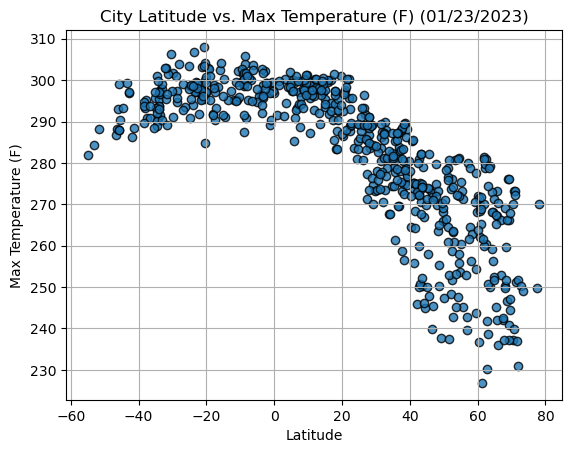

In [18]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
date = time.strftime("%m/%d/%Y")
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (F) ({date})')
plt.grid(True)



# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

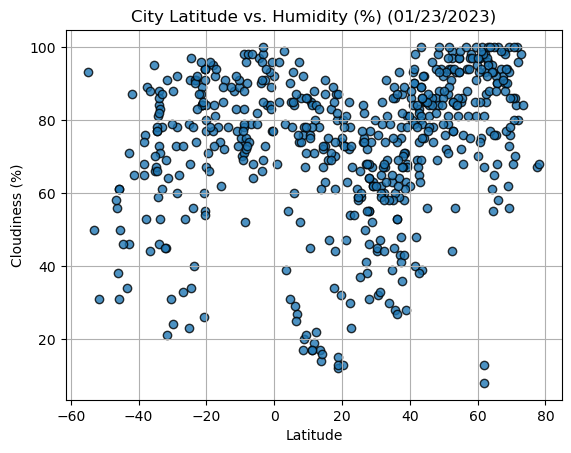

In [19]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Humidity (%) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

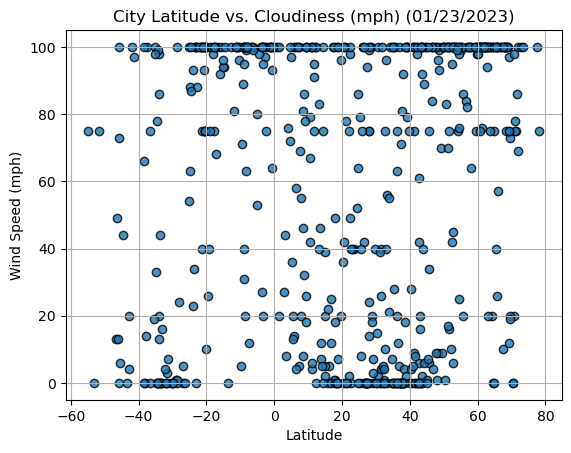

In [20]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Cloudiness (mph) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

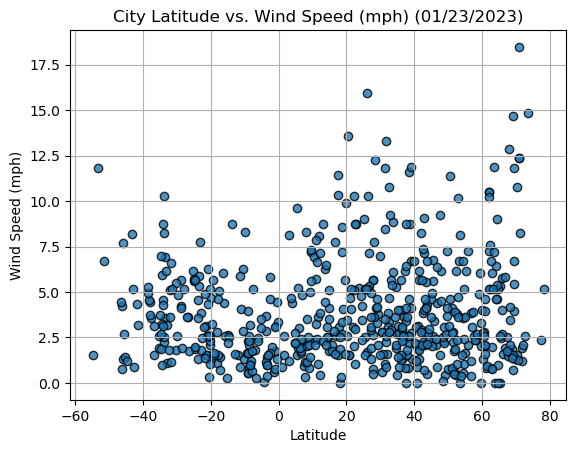

In [21]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (mph) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def linear_plot(data_df,a,xx,yy):
    x_values = data_df['Lat']
    y_values = data_df[a]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(xx,yy),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Humidity (%)')
    plt.title("Humidity (%) vs Latitude in Southern Hemisphere")
    plt.show()
    print(f"The r-value is: {rvalue}")

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,vanavara,60.3400,102.2797,236.68,97,100,1.34,RU,1674523669
8,ohara,35.2500,140.3833,279.07,89,100,3.14,JP,1674523670
10,norman wells,65.2820,-126.8329,245.17,76,40,0.00,CA,1674523631
11,cherskiy,68.7500,161.3000,246.52,94,100,1.86,RU,1674523619
13,ciudad guayana,8.3533,-62.6528,299.55,76,8,3.53,VE,1674523671


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lucapa,-8.4192,20.7447,290.76,96,99,1.05,AO,1674523668
1,padang,-0.9492,100.3543,297.18,89,100,1.78,ID,1674523505
2,punta arenas,-53.1500,-70.9167,284.21,50,0,11.83,CL,1674523489
3,kaitangata,-46.2817,169.8464,288.23,56,49,4.21,NZ,1674523634
4,bluff,-46.6000,168.3333,286.73,58,13,4.43,NZ,1674523566


###  Temperature vs. Latitude Linear Regression Plot

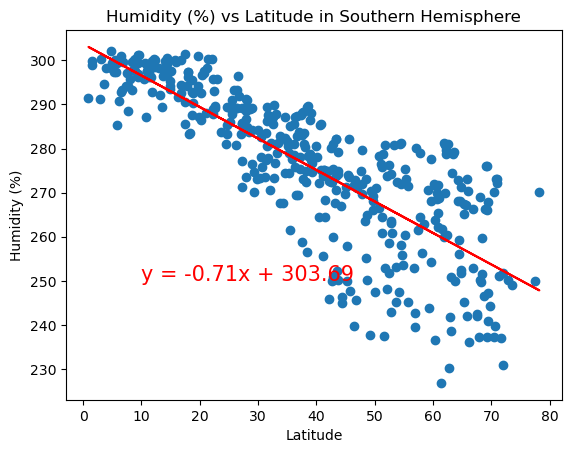

The r-value is: -0.8037787090302276


In [29]:
# Linear regression on Northern Hemisphere
linear_plot(northern_hemi_df,"Max Temp",10,250)

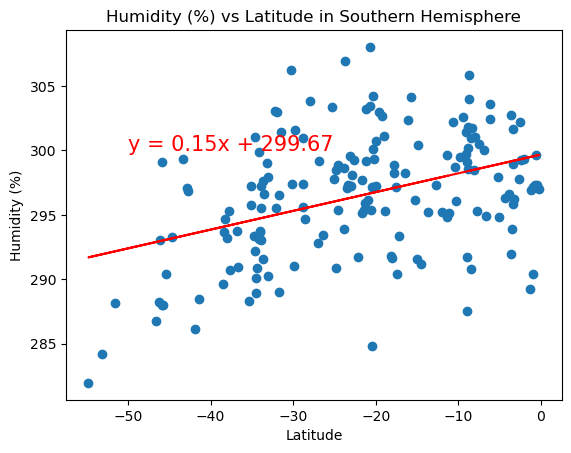

The r-value is: 0.40580055523038466


In [33]:
# Linear regression on Southern Hemisphere
linear_plot(southern_hemi_df,"Max Temp",-50,300)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

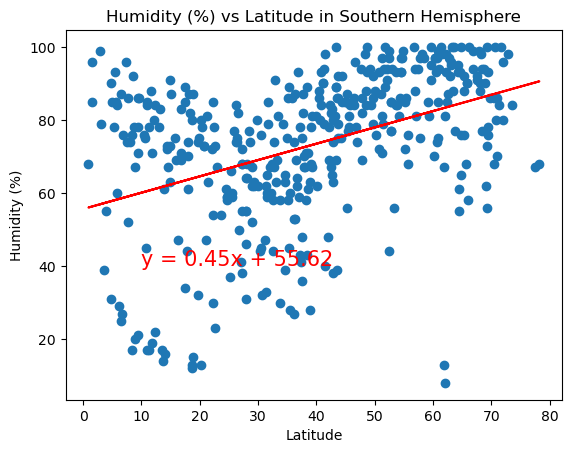

The r-value is: 0.4173825150414724


In [34]:
# Northern Hemisphere
linear_plot(northern_hemi_df,"Humidity",10,40)

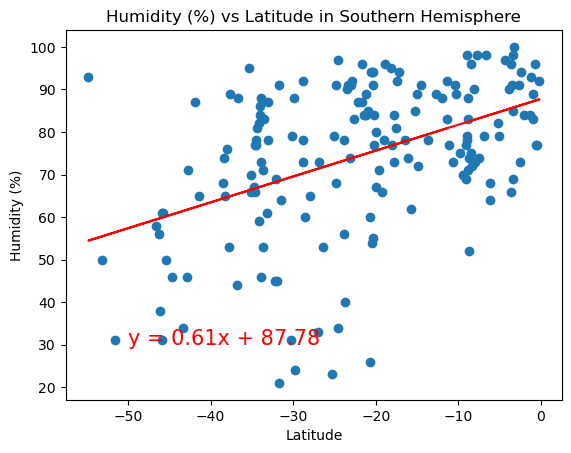

The r-value is: 0.4523172037648131


In [35]:
# Southern Hemisphere
linear_plot(southern_hemi_df,"Humidity",-50,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

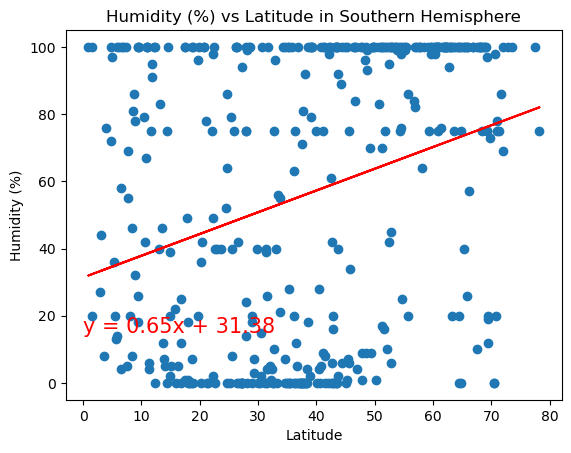

The r-value is: 0.2976070739337651


In [36]:
# Northern Hemisphere
linear_plot(northern_hemi_df,"Cloudiness",0,15)

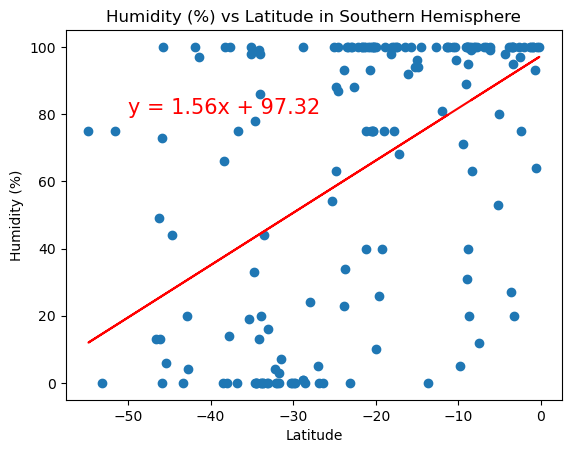

The r-value is: 0.5029050465783914


In [37]:
# Southern Hemisphere
linear_plot(southern_hemi_df,"Cloudiness",-50,80)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

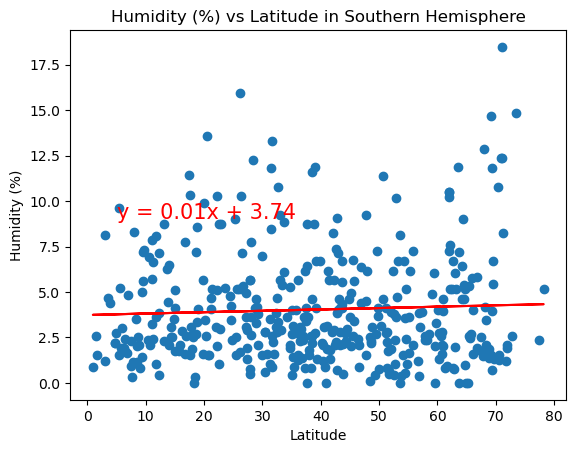

The r-value is: 0.04756793933447451


In [38]:
# Northern Hemisphere
linear_plot(northern_hemi_df,"Wind Speed",5,9)

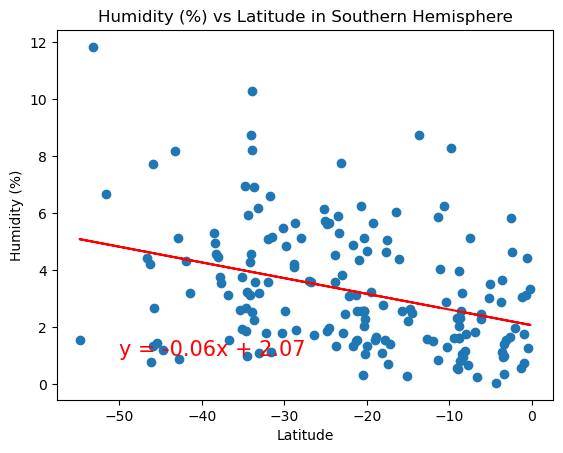

The r-value is: -0.3406704064013354


In [39]:
# Southern Hemisphere
linear_plot(southern_hemi_df,"Wind Speed",-50,1)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Negative correlation between latitude and maximum temperature
As we go North - there is more cloudiness